In [1]:
from music21 import *
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics as stats

In [41]:
#Randomly generate list of 100 songs
COMPOSERS_LIST = ["Bach", "Mozart", "Beethoven", "Haydn", "Schubert", "Liszt", "Chopin"]

In [3]:
localCorpus = corpus.corpora.LocalCorpus()
localCorpus.addPath('~/MusicAnalysis/Chopin')
localCorpus.addPath('~/MusicAnalysis/Beethoven')
localCorpus.addPath('~/MusicAnalysis/Haydn')
localCorpus.addPath('~/MusicAnalysis/Liszt')
localCorpus.addPath('~/MusicAnalysis/Mozart')
localCorpus.addPath('~/MusicAnalysis/Schubert')
corpus.cacheMetadata()

c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: local metadata cache: starting processing of paths: 109
c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: cache: filename: C:\Users\binkm\AppData\Local\Temp\music21\local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1622132884.812165
bundles.py: WARNING: Skipped 109 sources already in cache.
c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: cache: writing time: 0.115 md items: 109

c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: cache: filename: C:\Users\binkm\AppData\Local\Temp\music21\local.p.gz
caching.py: WARNING: cache: final writing time: 0.115 seconds


In [56]:
#Get Song List
songList = []
for composer in COMPOSERS_LIST:
    songList.extend(corpus.search(composer, 'composer'))
for composer in COMPOSERS_LIST:
    songList.extend(localCorpus.search(composer, 'composer'))


In [57]:
#Get Notes From Songs

#Two variables to store
middleNotes = 0
outerNotes = 0

noteList = []

for song in songList:
    songNotes = song.parse().flat.getElementsByClass(note.Note)
    print(song)
    for singleNote in songNotes:
        noteList.append(singleNote)

6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv64_2_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv64_4_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv64_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv65_2_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv65_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv67_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv69_6-a_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv70_11_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv73_5_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv74_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv77_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv78_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv8_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv80_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv81_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv83_5_mxl'>
<music21.metadata.bundles.Meta

In [59]:
#SRS of size 20000
octaves = []
for x in range(1,20000):
    randInd = random.randint(1,len(noteList))
    noteOct = noteList.pop(randInd).octave
    octaves.append(noteOct)
    if noteOct == 4 or noteOct == 5:
        middleNotes += 1
    else:
        outerNotes += 1


In [62]:
#Statistical Analysis
totalNotes = middleNotes + outerNotes
alpha = 0.05
zStar = 1.96

pHat = middleNotes / totalNotes
stdError = math.sqrt(pHat*(1-pHat)/totalNotes)

lowerBound = pHat - zStar*stdError
upperBound = pHat + zStar*stdError

confidenceInterval = (lowerBound, upperBound)
print(confidenceInterval)

zScore = (pHat - 0.5) / stdError
print(zScore)
print(pHat)


(0.580105063688918, 0.5937536292457288)
24.96694885140241
0.5869293464673234


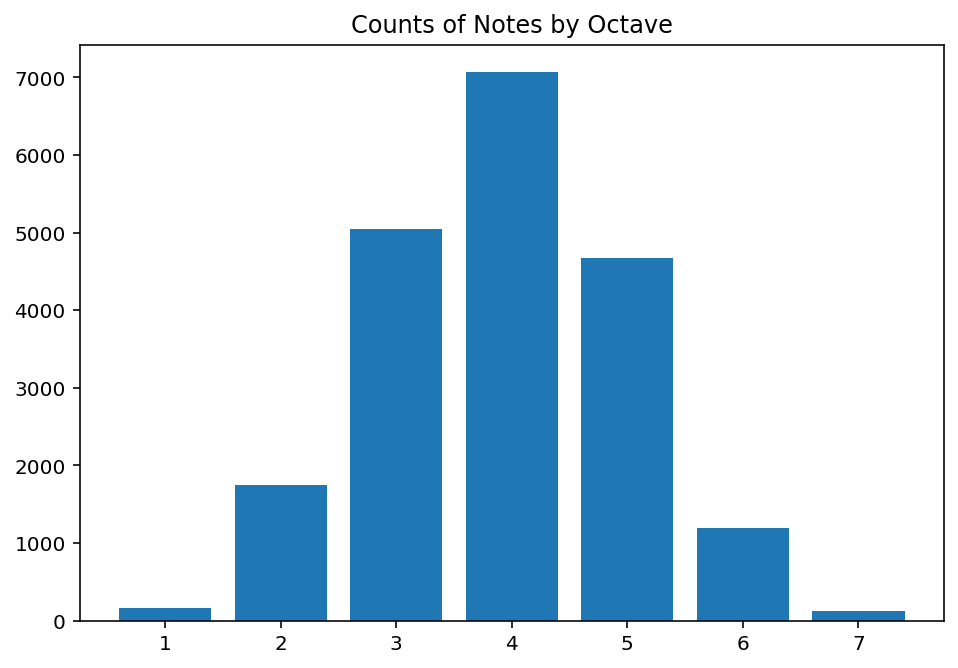

In [61]:
#Basic Histogram of the Notes Distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title(f"Counts of Notes by Octave")
octaveNames = [1, 2, 3, 4, 5, 6, 7]
counts = []
for i in range(1,8):
    count = octaves.count(i)
    counts.append(count)
ax.bar(octaveNames, counts)
plt.show()

In [65]:
mu = stats.mean(octaves)
sd = stats.stdev(octaves)
print(mu)
print(sd)
print(stats.variance(octaves))

3.919445972298615
1.0927857938076282
1.1941807911477682


In [13]:
composerOctaves = {}
for composer in COMPOSERS_LIST:
    composerSongs = []
    composerSongs.extend(corpus.search(composer, 'composer'))
    composerSongs.extend(localCorpus.search(composer, 'composer'))

    noteList = []

    for song in composerSongs:
        songNotes = song.parse().flat.getElementsByClass(note.Note)
        print(song)
        for singleNote in songNotes:
            noteList.append(singleNote)

    print(composer)
    print(len(noteList))

    octavesList = []

    for ind in range(1, 3000):
        randInd = random.randint(0, len(noteList))
        noteOct = noteList.pop(randInd).octave
        octavesList.append(noteOct)

    composerOctaves[composer] = octavesList




v64_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv65_2_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv65_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv67_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv69_6-a_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv70_11_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv73_5_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv74_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv77_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv78_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv8_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv80_8_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv81_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv83_5_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv84_5_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv85_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv86_6_mxl'>
<music21.metadata.bundles.

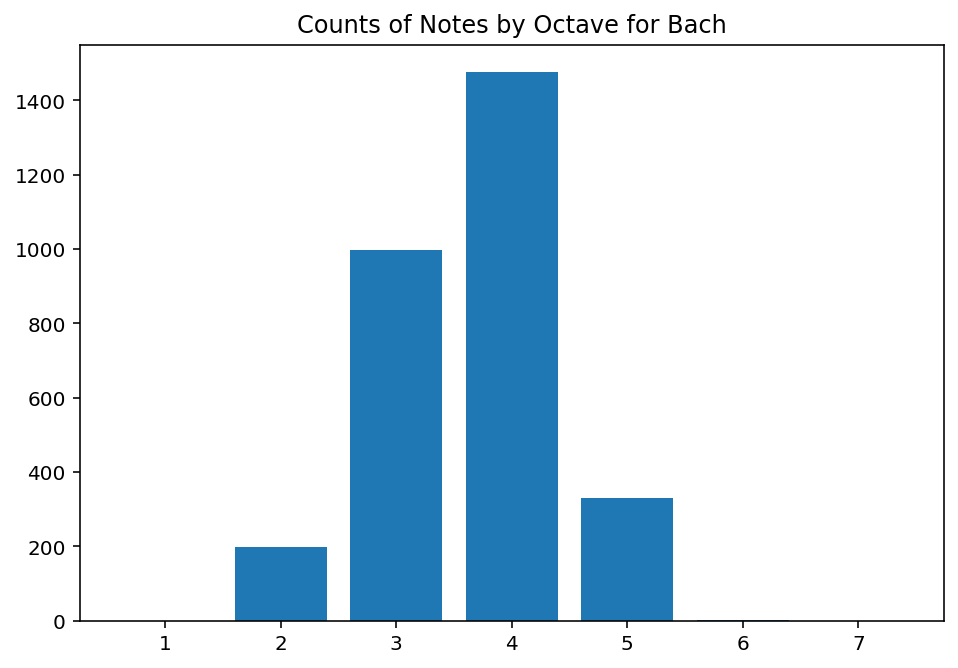

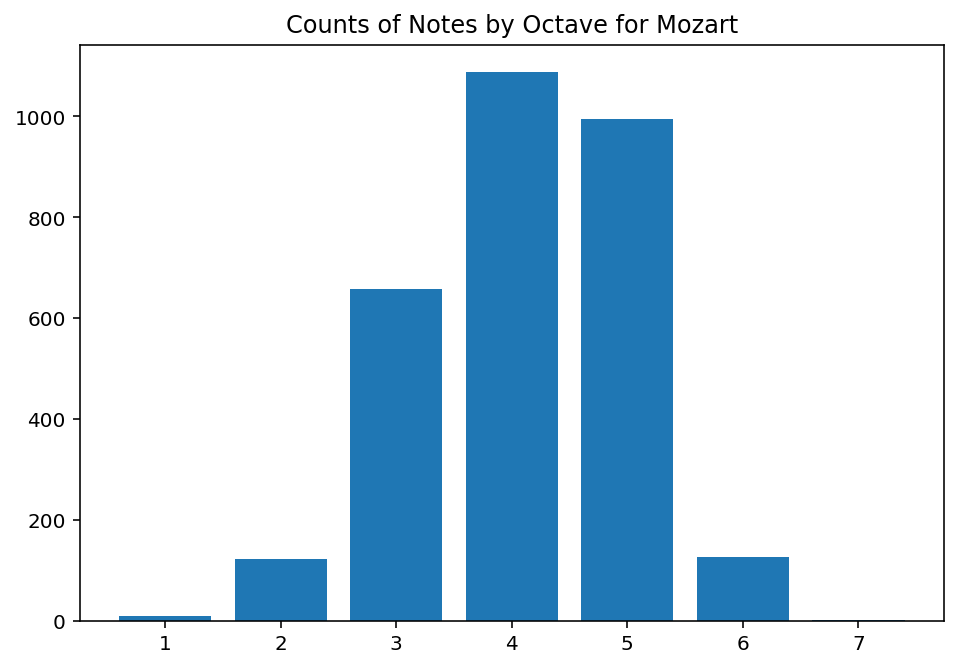

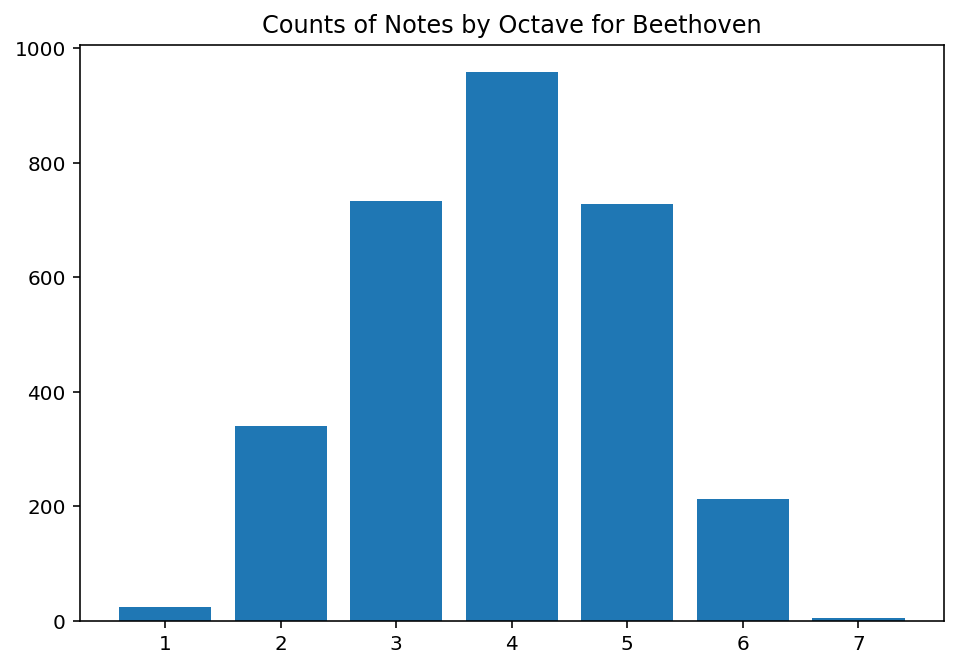

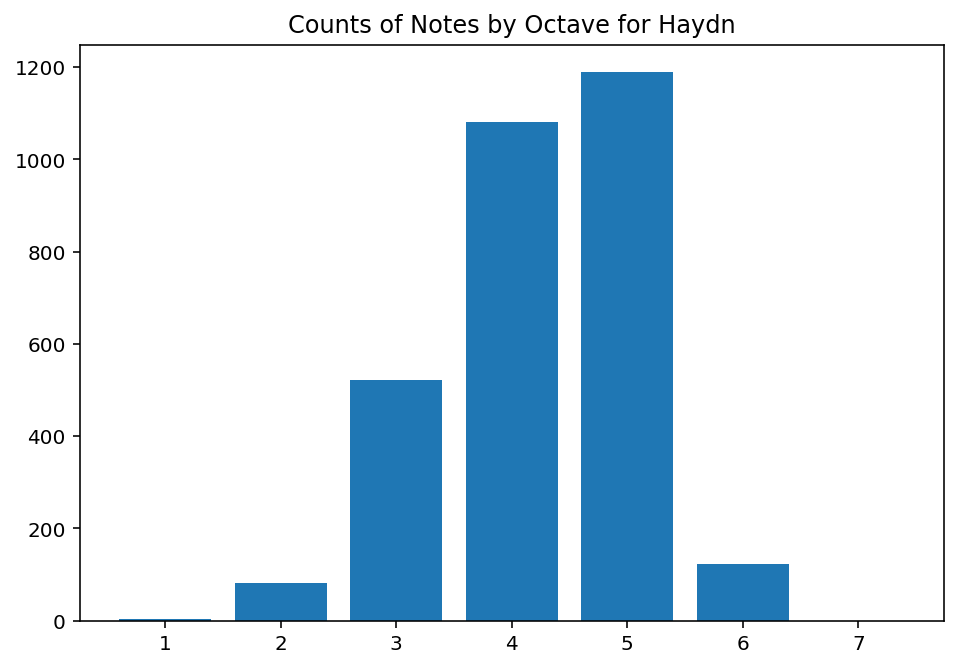

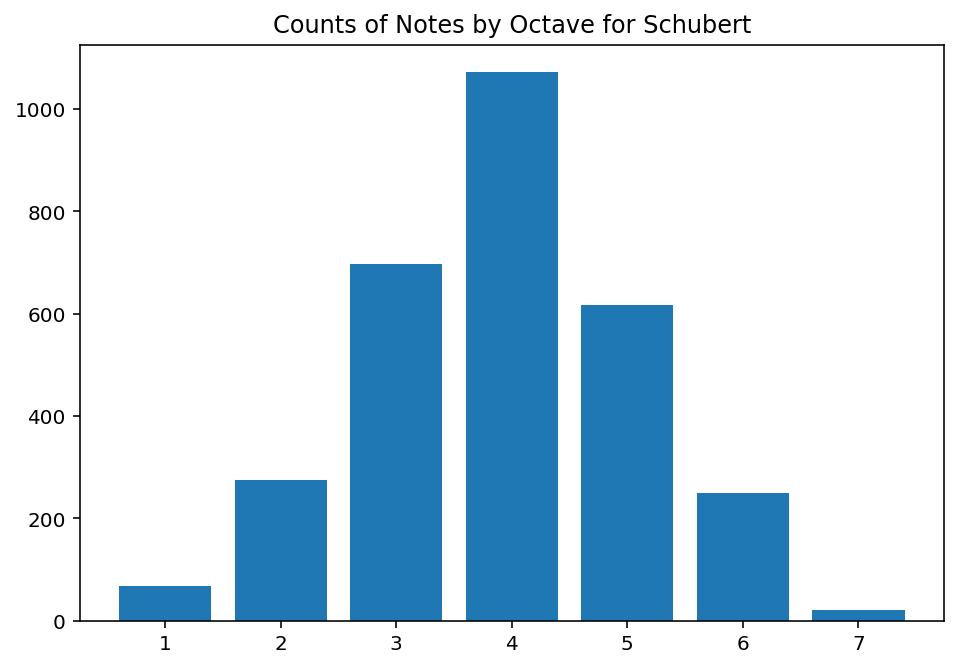

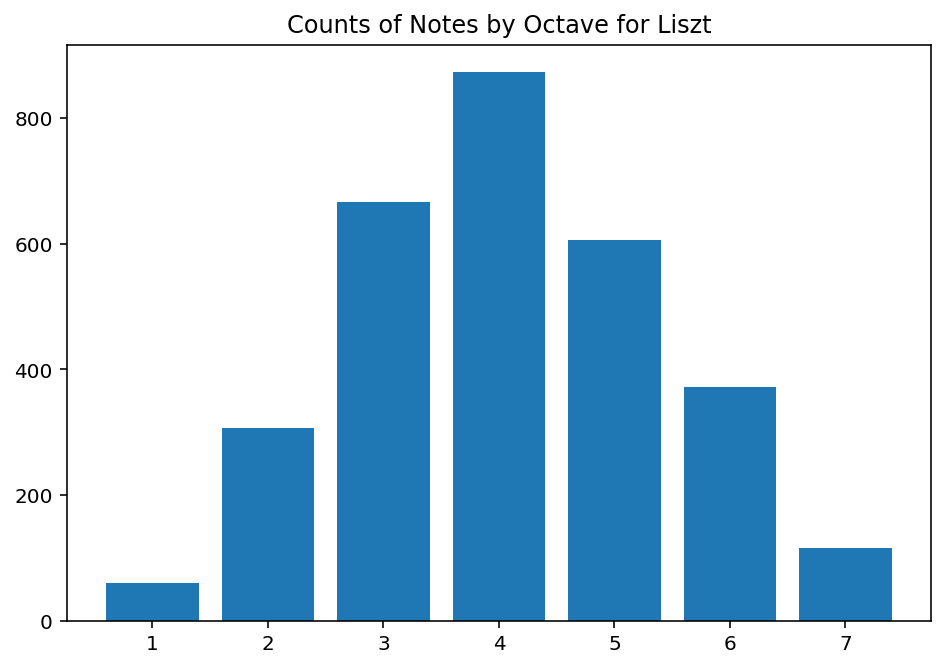

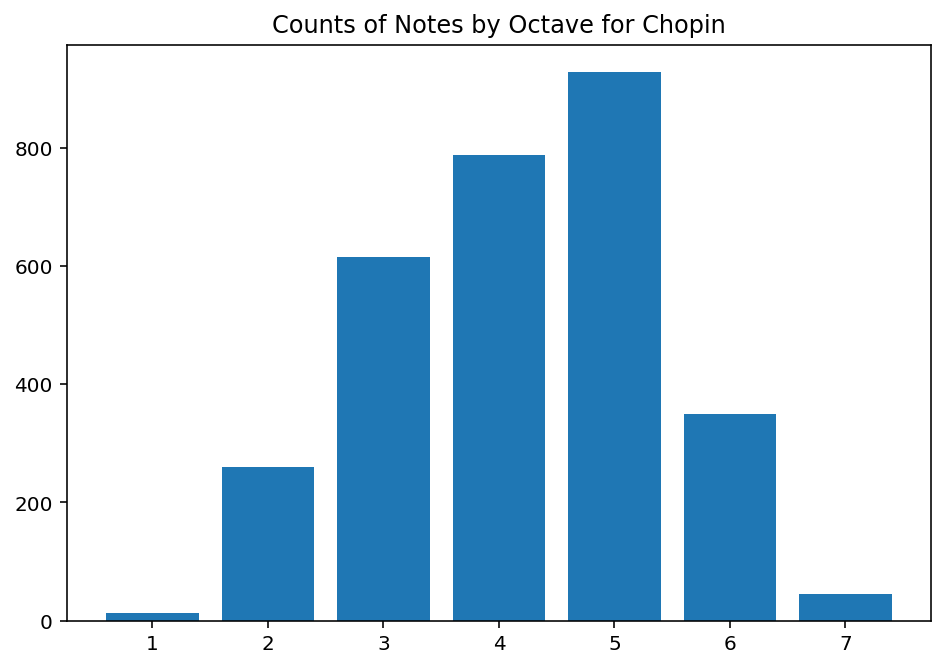

In [54]:
#Bar Charts for composerOctaves
composerCounts = {}
for composer in COMPOSERS_LIST: 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(f"Counts of Notes by Octave for {composer}")
    octaveNames = [1, 2, 3, 4, 5, 6, 7]
    counts = []
    for i in range(1,8):
        count = composerOctaves[composer].count(i)
        counts.append(count)
    composerCounts[composer] = counts
    ax.bar(octaveNames, counts)
    plt.show()

In [55]:
composerCounts

{'Bach': [0, 197, 996, 1476, 329, 1, 0],
 'Mozart': [9, 122, 658, 1088, 994, 126, 2],
 'Beethoven': [23, 340, 732, 958, 728, 213, 5],
 'Haydn': [3, 82, 522, 1080, 1189, 123, 0],
 'Schubert': [68, 275, 697, 1072, 617, 250, 20],
 'Liszt': [60, 306, 666, 873, 606, 372, 116],
 'Chopin': [13, 260, 615, 788, 928, 350, 45]}